In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
import altair as alt
alt.renderers.enable('html')

RendererRegistry.enable('html')

In [2]:
df = pd.read_csv("C:/Users/Owen/Downloads/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


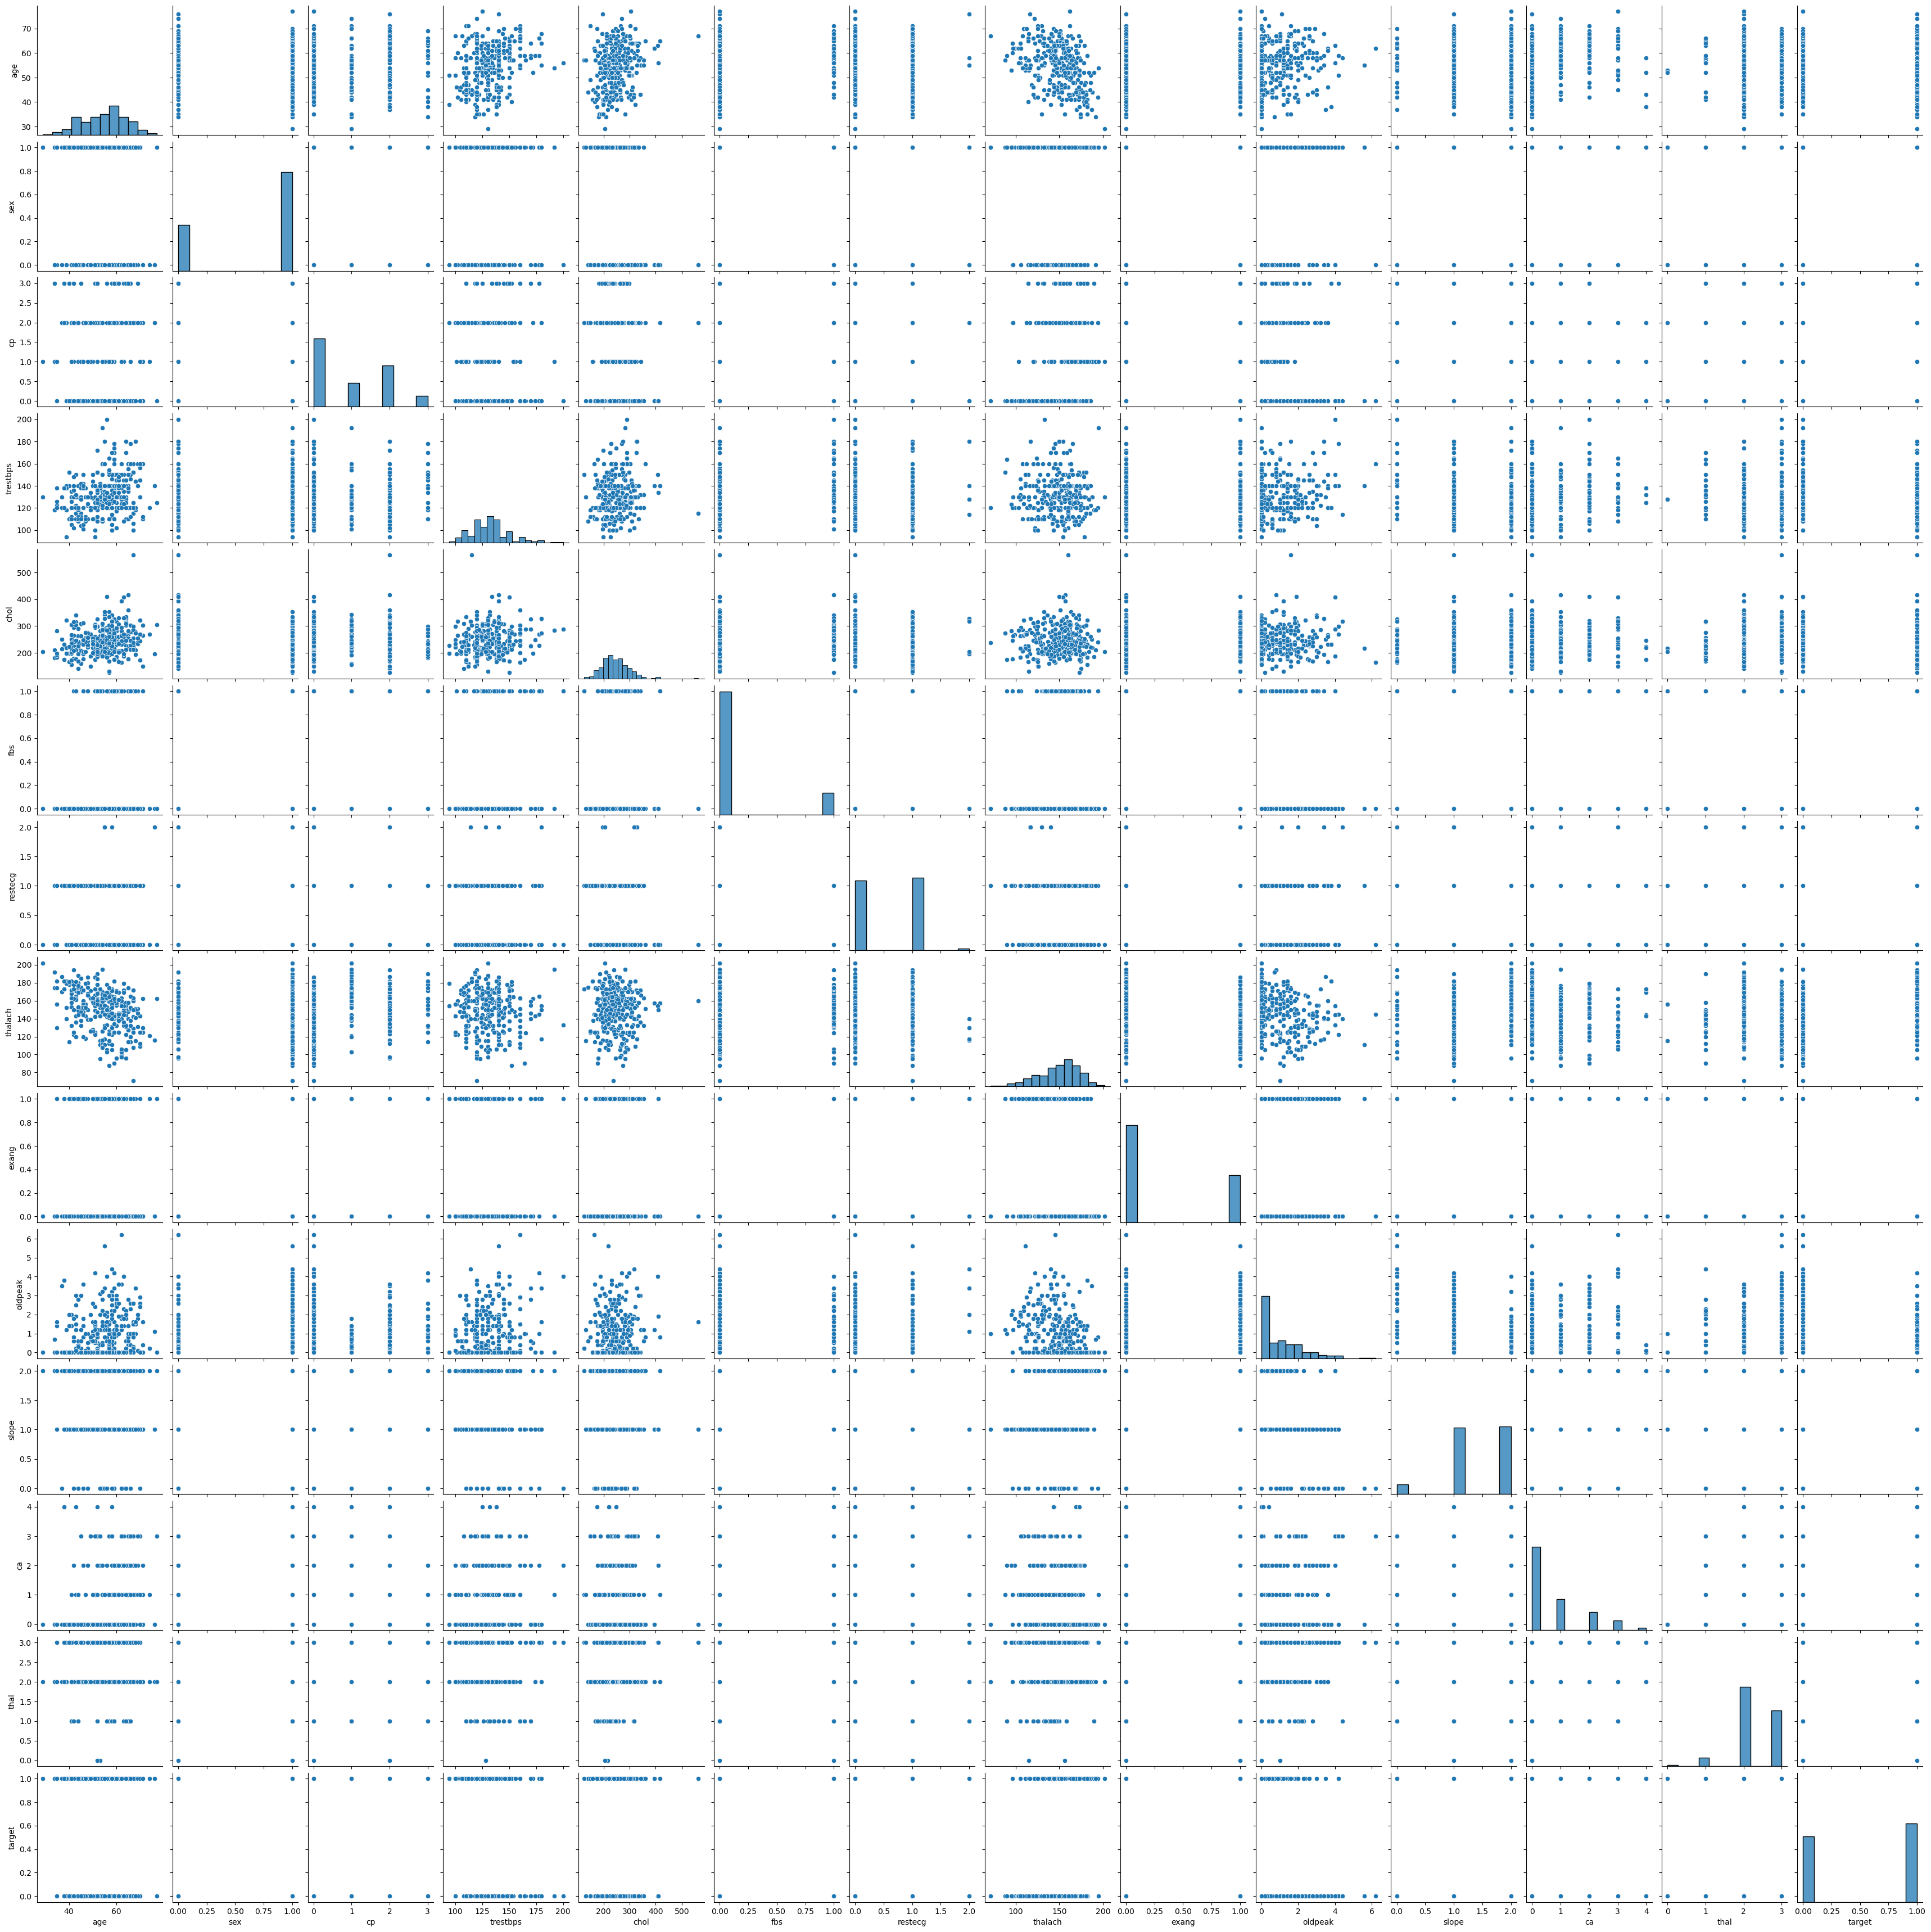

In [6]:
sns.pairplot(df)

In [7]:
import altair as alt
import pandas as pd

charts = {}
for i in df.columns:
    feature_count = df[i].value_counts().reset_index()
    feature_count.columns = [i, 'count']
    chart = alt.Chart(feature_count).mark_bar().encode(
        y=alt.Y(f"{i}:N", axis=alt.Axis(title=i)),
        x=alt.X('count:Q', axis=alt.Axis(title='Count')),
        tooltip=[i, 'count']
    ).properties(title=f"Counts of {i}", width=400)
    charts[i] = chart
((charts['age'] | charts['sex'] | charts['trestbps']) & (charts['chol'] | charts['fbs']))

alt.VConcatChart(...)

In [8]:
jumlah = (df['chol'] >= 200).sum()
print(f"Jumlah nilai 'chol' di atas 200: {jumlah}")

Jumlah nilai 'chol' di atas 200: 253


In [9]:
jumlah = len(df[df['chol'] < 200])
print(f"Jumlah nilai 'chol' di bawah 200: {jumlah}")

Jumlah nilai 'chol' di bawah 200: 50


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

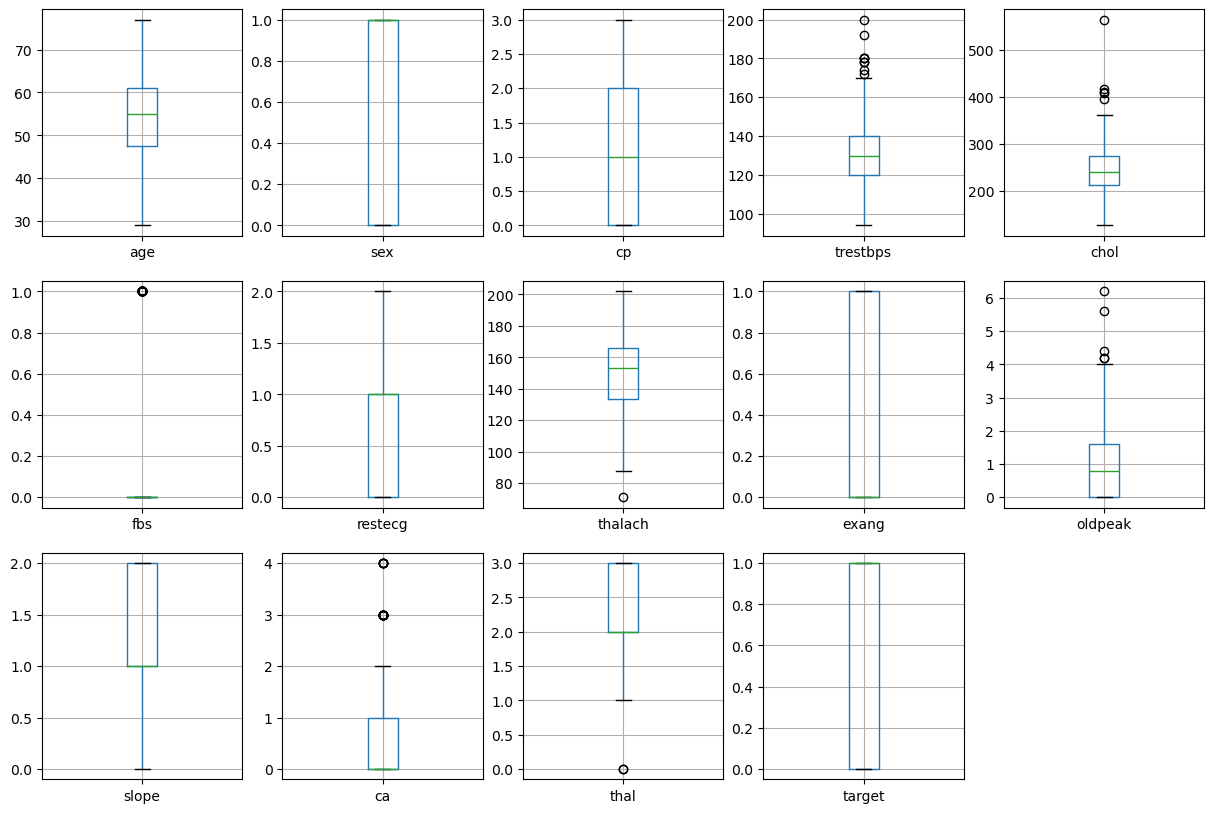

In [11]:
plt.figure(figsize = (15,10))
n = 0
for i in  df :
    n += 1
    plt.subplot(3,5,n)
    df.boxplot(i)

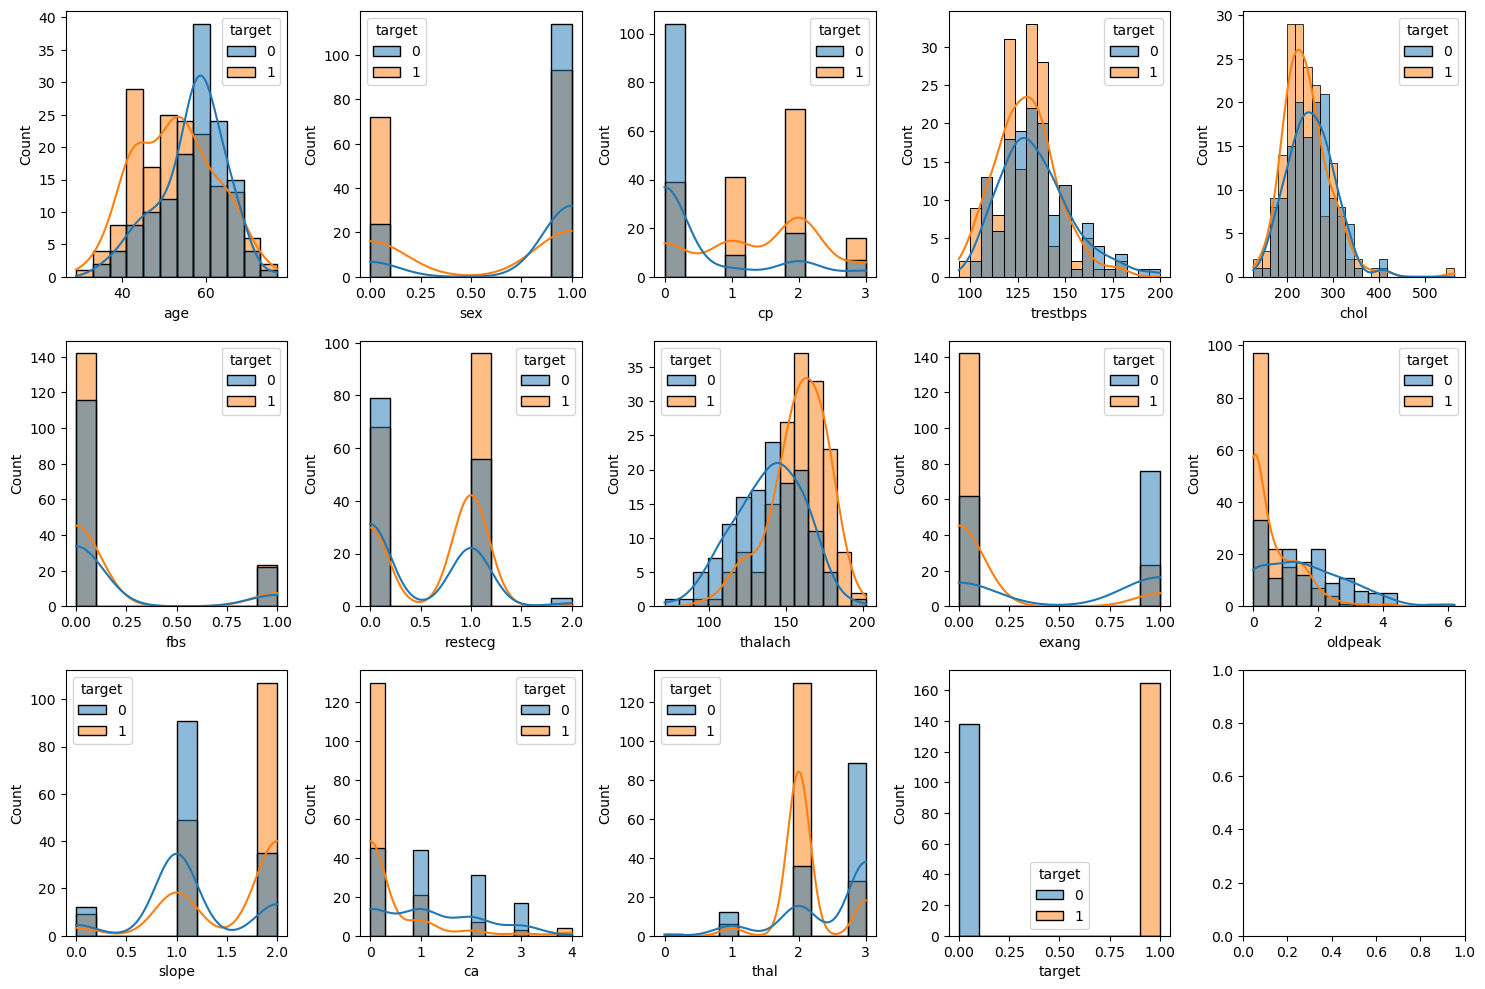

In [12]:
fig,ax = plt.subplots(3,5, figsize=(15,10))
for i,col in enumerate(df):
    sns.histplot(data=df, x=col,kde=True, ax=ax[i//5, i%5], hue = 'target')
plt.tight_layout()
plt.show()

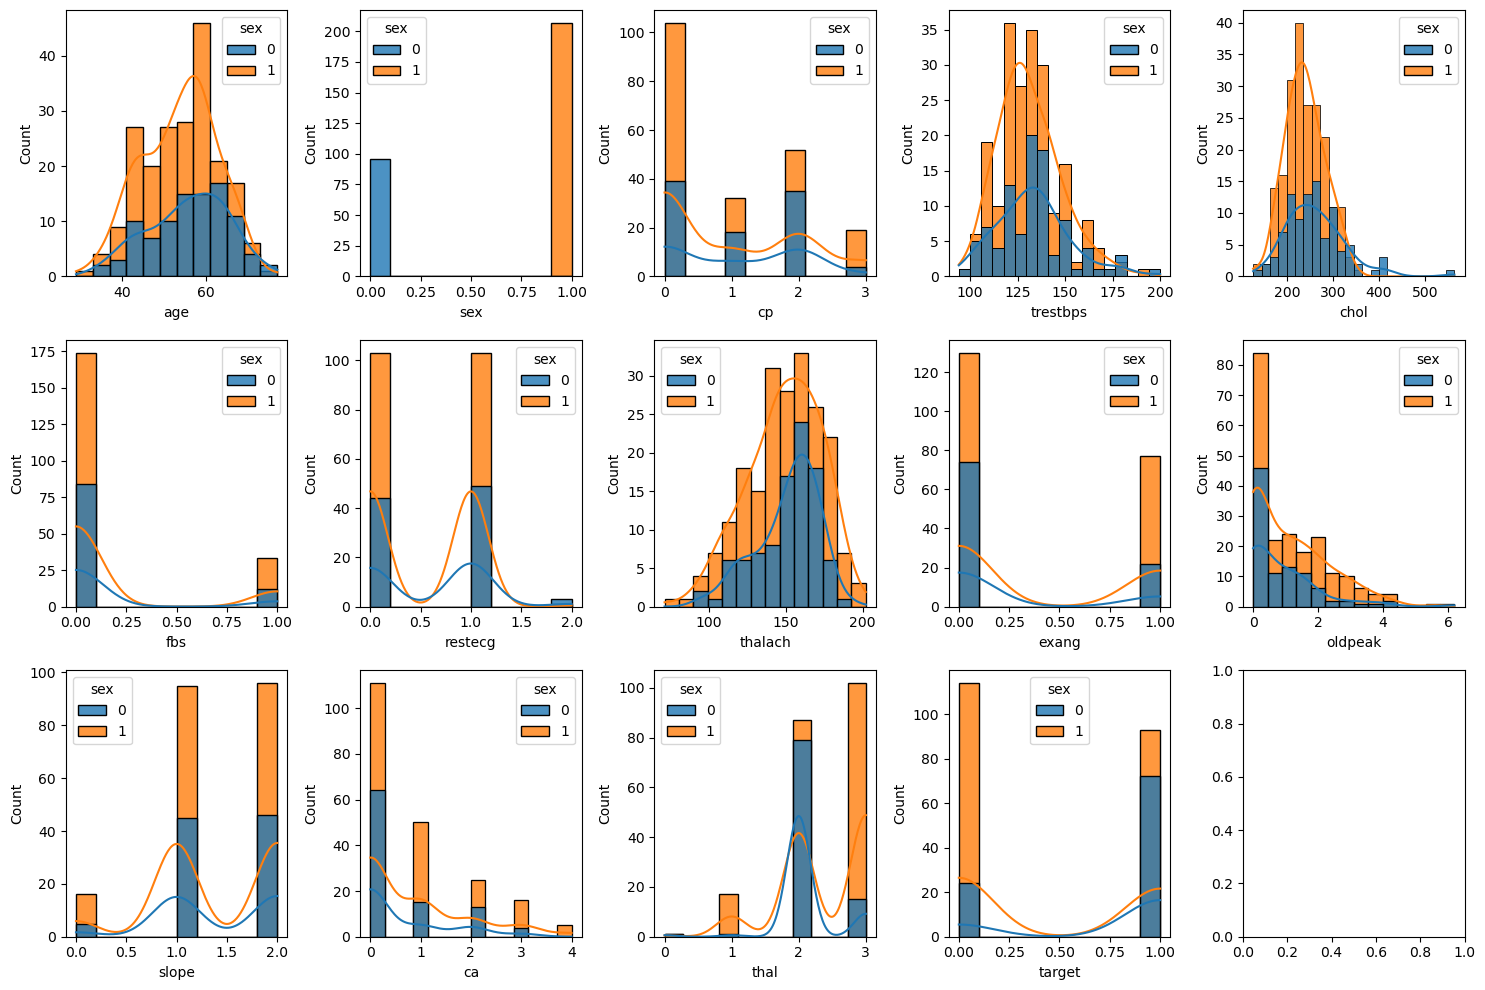

In [13]:
fig,ax = plt.subplots(3,5, figsize=(15,10))
for i,col in enumerate(df):
    sns.histplot(data=df, x=col,kde=True, ax=ax[i//5, i%5], hue = 'sex', alpha=0.8)
plt.tight_layout()
plt.show()

conclusion :
#Skewed

In [15]:
X = df.drop('target',axis=1)
y = df['target']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)
print(f"{X_train.shape}, {X_test.shape}, {y_train.shape}, {y_test.shape}")

(242, 13), (61, 13), (242,), (61,)


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8197


In [18]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8430


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.497\nsamples = 242\nvalue = [111, 131]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.405\nsamples = 117\nvalue = [84, 33]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.494\nsamples = 54\nvalue = [24, 30]'),
 Text(0.0625, 0.125, 'gini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.1875, 0.125, 'gini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.375, 0.375, 'x[0] <= 63.5\ngini = 0.091\nsamples = 63\nvalue = [60, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.4375, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.75, 0.625, 'x[1] <= 0.5\ngini = 0.339\nsamples = 125\nvalue = [27, 98]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[11] <= 1.5\ngini = 0.042\nsamples = 47\nvalue = [1, 46]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 43]'),
 Text(0.6875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.875, 0.375, 'x[0] <= 56.5\ng

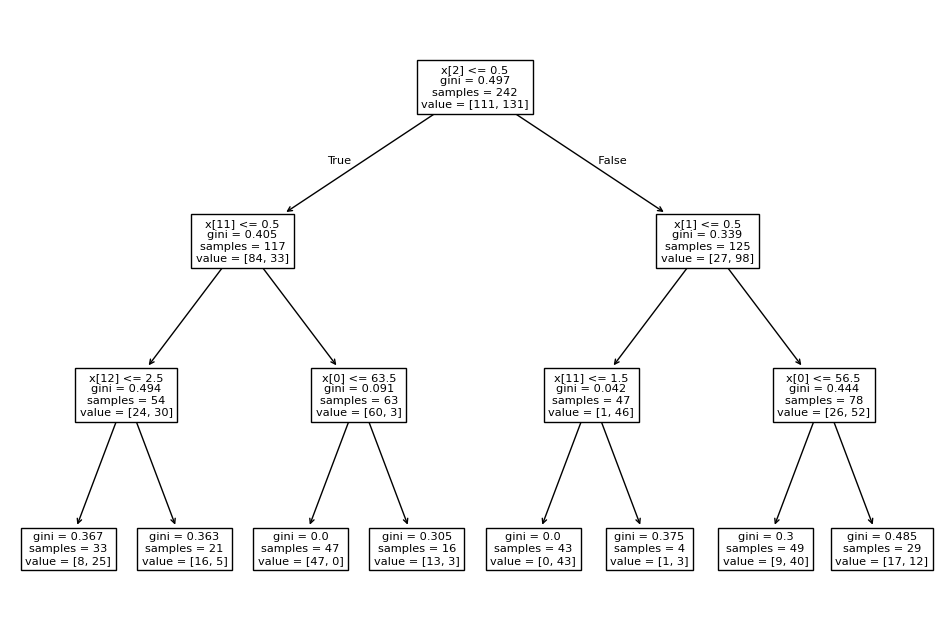

In [19]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

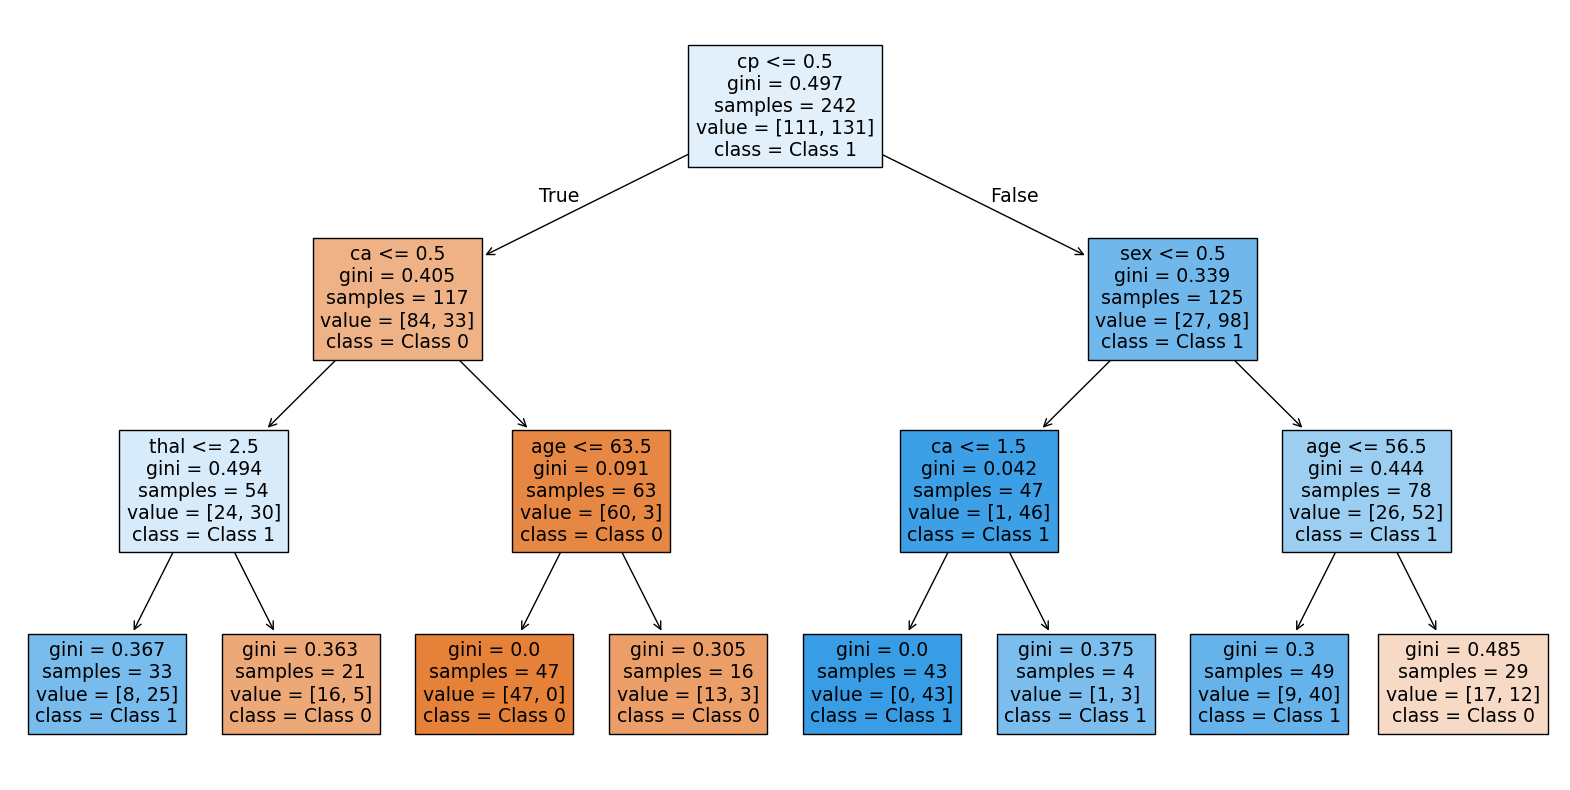

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_names = df.columns.tolist()  # Ambil nama fitur dari DataFrame
root_feature = clf_gini.tree_.feature[0]
root_feature_name = feature_names[root_feature] 
# Tampilkan struktur Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf_gini, feature_names=df.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [25]:
clf_gini.feature_importances_

array([0.10327074, 0.08747756, 0.46638683, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23678694, 0.10607794])

In [26]:
features = X.columns  
importances = clf_gini.feature_importances_

for feature, importance in zip(features, importances):
    if importance > 0:  
        print(f"Fitur: {feature}, Importance: {importance:.4f}")


Fitur: age, Importance: 0.1033
Fitur: sex, Importance: 0.0875
Fitur: cp, Importance: 0.4664
Fitur: ca, Importance: 0.2368
Fitur: thal, Importance: 0.1061


In [45]:
kolumn = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns = kolumn)
X_test = pd.DataFrame(X_test, columns = kolumn)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-1.327733,0.696177,-0.922749,0.011371,0.004491,2.392117,-0.979367,-0.295246,1.409842,-0.808551,-0.661693,3.181981,1.141906
238,-0.095367,0.696177,-0.922749,-0.691224,-1.101178,-0.418040,0.901639,-1.592757,-0.709299,0.282698,-0.661693,0.265165,1.141906
239,0.128699,0.696177,1.940138,-0.691224,-1.007478,-0.418040,-0.979367,0.526511,-0.709299,0.702409,-0.661693,-0.707107,1.141906
240,-0.879600,0.696177,0.985842,0.362669,0.191893,-0.418040,-0.979367,0.267008,-0.709299,-0.892493,0.955779,-0.707107,-0.464729


In [49]:
Model = LogisticRegression(solver='liblinear', random_state=0)
Model.fit(X_train,y_train)
Model.score(X_test,y_test)

0.8360655737704918

In [55]:
y_pred = Model.predict(X_test)
print('Model accuracy score ', format(accuracy_score(y_test, y_pred)))

Model accuracy score  0.8360655737704918


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediksi
y_pred = knn.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8525


In [69]:
latih = knn.predict(X_train)
accuracy_score(y_train, latih)

0.8760330578512396